# Ejemplos de Random Forest

Primero vamos a realizar un random forest sobre nuestro fichero de Iris.

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [2]:
iris=load_iris()


In [3]:
y = iris.target
X = iris.data

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [5]:
from sklearn.ensemble import RandomForestClassifier

In [6]:
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

In [7]:
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train))) 
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))


Accuracy on training set: 1.000
Accuracy on test set: 0.974


Vemos que la precisión sobre el conjunto de entrenamiento llega a **1.00**, lo cual nos indica que es muy probable que tengamos **sobreajuste** en el set de entrrenamiento, aunque la precisión en el conjunto de test es bastante buena.

Una de las cosas interesantes con random forest es que podemos ver cuales son las características importantes de nuestro problema. 

In [8]:
def plot_feature_importances(model):
    n_features = iris.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), iris.feature_names) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

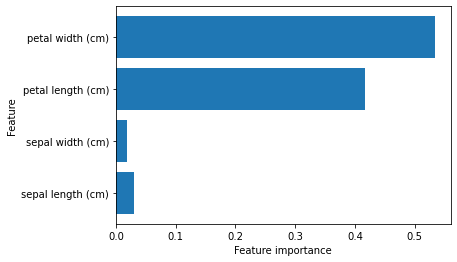

In [9]:
import matplotlib.pyplot as plt
import numpy as np
plot_feature_importances(forest)

## Random Forest sobre los datos de cancer de mama

Vamos a trabajar ahora sobre una base de datos algo más grande, como es la de cancer de mama. Como el RF es un conjunto de árboles de decisión, primero, vamos a aplica un árbol de de decisión sobre la base de datos y luego vamos a aplicar un random forest

In [12]:
from sklearn.datasets import load_breast_cancer 


cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=0)


In [13]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train))) 
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))


Accuracy on training set: 1.000
Accuracy on test set: 0.902


In [14]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), cancer.feature_names) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

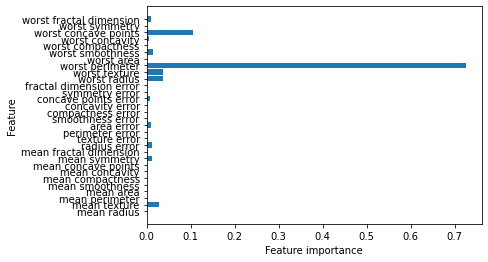

In [15]:
plot_feature_importances_cancer(tree)

Para tener algo de control sobre los parámetros que utilizamos en el RF, primero decido aplicar un número de árboles de 100, `n_estimators=100`. En general como regla de oro, cuanto mayor número de estimadores mejor, ya que al añadir más número de estimadores el overfitting debería disminuir, pero eso siempre es a coste de tiempo de cómputo, no es gratis. Otro parámetro que tenemos que precisar es el `max_features`que va a controlar la aleatoriedad de cada árbol. Si reducimos este parámetro aumentamos la aleatoriedad de los árboles y por tanto reducimos el overfitting. Una regla de oro para la clasificación es: `max_features = sqrt(n_features)`y por último, uno que ya vimos para los decision tree que es la profundidad de los árboles `max_depth`
 

In [16]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, max_features='sqrt',random_state=0)
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train))) 
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))


Accuracy on training set: 1.000
Accuracy on test set: 0.972


In [17]:
forest = RandomForestClassifier(n_estimators=100, max_features='sqrt',max_depth=7,random_state=0)
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train))) 
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))



Accuracy on training set: 0.998
Accuracy on test set: 0.979


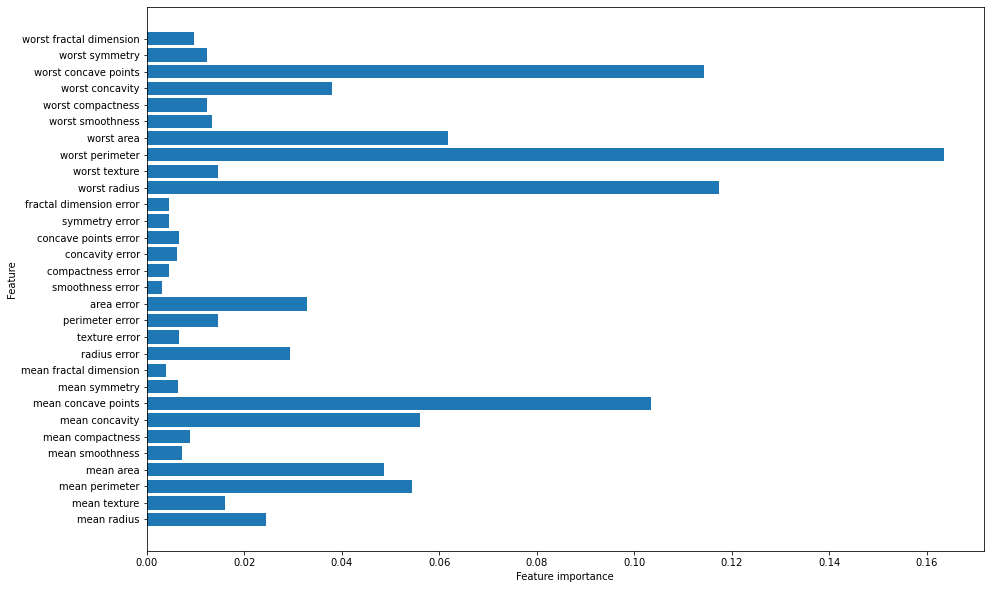

In [18]:
plt.figure(figsize=(15,10))
plot_feature_importances_cancer(forest)

Una característica de los RF es que cuando estudiamos las características importantes son más que las que aparecen en un único árbol de decisión.

In [19]:
help(RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble._forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------
